# Winning a Kaggle Competition in Python

Kaggle is the most famous platform for Data Science competitions. Taking part in such competitions allows you to work with real-world datasets, explore various machine learning problems, compete with other participants and, finally, get invaluable hands-on experience. In this course, you will learn how to approach and structure any Data Science competition. You will be able to select the correct local validation scheme and to avoid overfitting. Moreover, you will master advanced feature engineering together with model ensembling approaches. All these techniques will be practiced on Kaggle competitions datasets.

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Winning a Kaggle Competition in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, roc_auc_score, f1_score, log_loss
from sklearn.model_selection import KFold, StratifiedKFold, TimeSeriesSplit, train_test_split

from sklearn.impute import SimpleImputer
import itertools


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Kaggle competitions process

In this first chapter, you will get exposure to the Kaggle competition process. You will train a model and prepare a csv file ready for submission. You will learn the difference between Public and Private test splits, and how to prevent overfitting.

#### Exercício 1 - Competitions overview

In [5]:
#vídeo

# New York city taxi fare prediction
taxi_train = pd.read_csv(data_folder + "taxi_train_chapter_4.csv")
taxi_test = pd.read_csv(data_folder + "taxi_test_chapter_4.csv")

print(taxi_train.columns)
print(taxi_test.columns)
print("\nThe target is the feature 'fare_amount'")
taxi_train.head()

Index(['id', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
Index(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

The target is the feature 'fare_amount'


id  fare_amount          pickup_datetime  pickup_longitude  \
0   0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1   1         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2   2          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3   3          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4   4          5.3  2010-03-09 07:51:00 UTC        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1

Exercício 2

In [6]:
# Explore train data

# You will work with another Kaggle competition called "Store Item Demand Forecasting Challenge". 
# In this competition, you are given 5 years of store-item sales data, and asked to predict 3 months of sales for 50 
# different items in 10 different stores.
# To begin, let's explore the train data for this competition. For the faster performance, you will work with a subset of 
# the train data containing only a single month history.
# Your initial goal is to read the input data and take the first look at it.

# Read train data
train = pd.read_csv(data_folder + 'demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
train.head()

Train shape: (15500, 5)


id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20

Exercício 3

In [7]:
# Explore test data

# Having looked at the train data, let's explore the test data in the "Store Item Demand Forecasting Challenge". Remember, 
# that the test dataset generally contains one column less than the train one.
# This column, together with the output format, is presented in the sample submission file. Before making any progress in 
# the competition, you should get familiar with the expected output.
# That is why, let's look at the columns of the test dataset and compare it to the train columns. Additionally, let's 
# explore the format of the sample submission. 

# Read the test data
test = pd.read_csv(data_folder + 'demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

# # Read the sample submission file
# sample_submission = pd.read_csv('sample_submission.csv')

# # Look at the head() of the sample submission
# sample_submission.head()

print("""\nThe sample submission file consists of two columns: id of the observation and sales column for your predictions. 
Kaggle will evaluate your predictions on the true sales data for the corresponding id. So, it’s important to keep track of
the predictions by id before submitting them. Let’s jump in the next lesson to see how to prepare a submission file.""")


Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']

The sample submission file consists of two columns: id of the observation and sales column for your predictions. 
Kaggle will evaluate your predictions on the true sales data for the corresponding id. So, it’s important to keep track of
the predictions by id before submitting them. Let’s jump in the next lesson to see how to prepare a submission file.


#### Exercício 4 - Prepare your first submission

['id', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


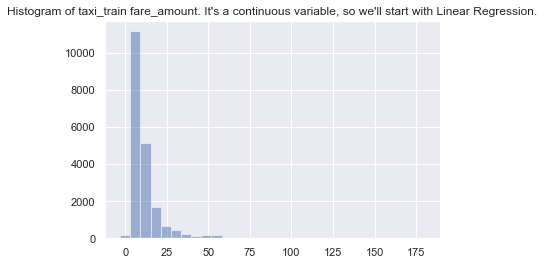

In [8]:
#vídeo

# New York city taxi fare prediction
print(taxi_train.columns.to_list())

# Plot a histogram
taxi_train.fare_amount.hist(bins=30, alpha=0.5)
plt.title("""Histogram of taxi_train fare_amount. It's a continuous variable, so we'll start with Linear Regression.""",
         fontsize=12)
plt.show()

# Build a model
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
lr = LinearRegression()

# Select features
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

# Fit the model on the train data
X = taxi_train[features]
y = taxi_train['fare_amount']

lr.fit(X, y)

# Predict on test set
taxi_test['fare_amount'] = lr.predict(taxi_test[features])

############################################################################################################

# Prepare submission

# Read a sample submission file  ---> ver como entregar ---> neste caso é 'pickup_datetime' e 'fare_amount' (prediction)
# taxi_sample_sub = pd.read_csv('taxi_sample_submission.csv')
# taxi_sample_sub.head(1)

# Prepare a submission file
taxi_submission = taxi_test[['pickup_datetime', 'fare_amount']]

# Save the submission file as .csv
taxi_submission.to_csv(data_folder + 'submissions/first_sub.csv', index=False)


Exercício 5

In [9]:
# previous defined data to study: 'demand_forecasting_train_1_month' & 'demand_forecasting_test'
print(train.head(), "\n\n", test.head())

       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20 

    id        date  store  item
0   0  2018-01-01      1     1
1   1  2018-01-02      1     1
2   2  2018-01-03      1     1
3   3  2018-01-04      1     1
4   4  2018-01-05      1     1


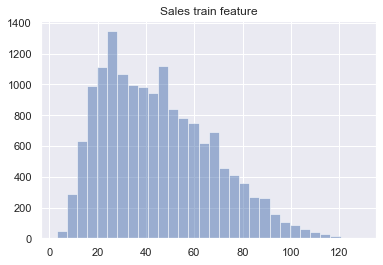

The sales variable is continuous, so you're solving a regression problem.


In [10]:
# Determine a problem type

# Before building a model, you should determine the problem type you are addressing. The goal of this exercise is to look 
# at the distribution of the target variable, and select the correct problem type you will be building a model for.
# The train DataFrame is already available in your workspace. It has the target variable column called "sales".

train['sales'].hist(bins=30, alpha=0.5)

plt.title('Sales train feature')
plt.show()

print("""The sales variable is continuous, so you're solving a regression problem.""")

Exercício 6

In [11]:
# Train a simple model

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest object
rf = RandomForestRegressor(n_estimators=100)

# Train a model
X = train[['store', "item"]]
y = train["sales"]

rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Exercício 7

In [12]:
# Prepare a submission

# Read test and sample submission data
# test = pd.read_csv('test.csv')
# sample_submission = pd.read_csv('sample_submission.csv')
# Show the head() of the sample_submission
# print(sample_submission.head())    # -------> 'id' & 'sales'

# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv(data_folder + 'submissions/kaggle_submission.csv', index=False)


#### Exercício 8 - Public vs Private leaderboard

In [13]:
#vídeo

Exercício 9

In [14]:
# What model is overfitting?

Exercício 10

In [15]:
# Train XGBoost models

# Every Machine Learning method could potentially overfit. You will see it on this example with XGBoost. 
# Firstly, let's train multiple XGBoost models with different sets of hyperparameters using XGBoost's learning API. The 
# single hyperparameter you will change is:
#  - max_depth: maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

import xgboost as xgb

# Create DMatrix on train data
X_train = train[['store', 'item']]
y_train = train['sales']

dtrain = xgb.DMatrix(data=X_train, label=y_train)

# Define xgboost parameters and train xgboost model
params = {'objective': 'reg:linear', 'max_depth': 2, 'silent': 1}
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

params = {'objective': 'reg:linear', 'max_depth': 8, 'silent': 1}
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

params = {'objective': 'reg:linear', 'max_depth': 15, 'silent': 1}
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Exercício 11

In [16]:
# Explore overfitting XGBoost

# Having trained 3 XGBoost models with different maximum depths, you will now evaluate their quality. For this purpose, you
# will measure the quality of each model on both the train data and the test data. As you know by now, the train data is 
# the data models have been trained on. The test data is the next month sales data that models have never seen before.

# The goal of this exercise is to determine whether any of the models trained is overfitting. To measure the quality of the
# models you will use Mean Squared Error (MSE). It's available in sklearn.metrics as mean_squared_error() function that 
# takes two arguments: true values and predicted values.

from sklearn.metrics import mean_squared_error

X_train = train[['store', 'item']]
X_test = test[['store', 'item']]
y_train = train['sales']
y_test = test['sales']

dtrain = xgb.DMatrix(data=X_train)
dtest = xgb.DMatrix(data=X_test)

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
   
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(y_train, train_pred)                  
    mse_test = mean_squared_error(y_test, test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))
    
print("""\nEra suposto o 3º modelo apresentar um training error decrescente mas um test error acima do do 2º modelo, para 
vermos o tal overfitting.""")

MSE Train: 331.064. MSE Test: 249.458
MSE Train: 112.057. MSE Test: 30.540
MSE Train: 84.952. MSE Test: 3.517

Era suposto o 3º modelo apresentar um training error decrescente mas um test error acima do do 2º modelo, para 
vermos o tal overfitting.


# CHAPTER 2 - Dive into the Competition

Now that you know the basics of Kaggle competitions, you will learn how to study the specific problem at hand. You will practice EDA and get to establish correct local validation strategies. You will also learn about data leakage.

#### Exercício 1 - Understand the problem

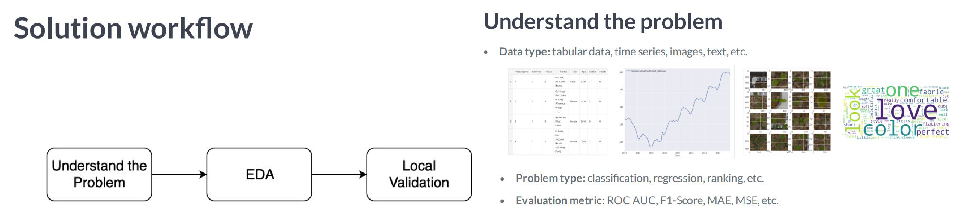

Metrics


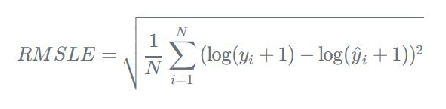

RMSLE - this metric we have to create


In [17]:
#vídeo

plot_2('solution_workflow', 'understand_problem')

# Metric definition
print("Metrics")

plot_1('RMSLE')

# Some classification and regression metrics
from sklearn.metrics import roc_auc_score, f1_score, mean_squared_error

print("RMSLE - this metric we have to create")
def rmsle(y_true, y_pred):
    diffs = np.log(y_true + 1) - np.log(y_pred + 1)
    squares = np.power(diffs, 2)
    err = np.sqrt(np.mean(squares))
    return err


Exercício 2

In [18]:
# Understand the problem type

# As you've just seen, the first step of the solution workflow is to skim through the problem statement. Your goal now is 
# to determine data types available as well as the problem type for the Avito Demand Prediction Challenge. The evaluation 
# metric in this competition is the Root Mean Squared Error. The problem definition is presented below.

# "In this Kaggle competition, Avito is challenging you to predict demand for an online advertisement based on its full 
# description (price, title, images, etc.), its context (geo position, similar ads already posted) and historical demand 
# for similar ads in the past.""

# What problem type are you facing, and what data do you have at your disposal?

print("""This is a regression problem with tabular, time series, image and text data.""")

This is a regression problem with tabular, time series, image and text data.


Exercício 3

In [19]:
y_classification_true = np.array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

y_classification_pred = np.array([0.2082483 , 0.4433677 , 0.71560128, 0.41051979, 0.19100696,
       0.96749431, 0.65075037, 0.86545985, 0.02524236, 0.26690581,
       0.5020711 , 0.06744864, 0.99303326, 0.2364624 , 0.37429218,
       0.21401191, 0.10544587, 0.23247979, 0.30061014, 0.63444227,
       0.28123478, 0.36227676, 0.00594284, 0.36571913, 0.53388598,
       0.16201584, 0.59743311, 0.29315247, 0.63205049, 0.02619661,
       0.88759346, 0.01611863, 0.12695803, 0.77716246, 0.04589523,
       0.71099869, 0.97104614, 0.87168293, 0.71016165, 0.95850974,
       0.42981334, 0.87287891, 0.35595767, 0.92976365, 0.14877766,
       0.94002901, 0.8327162 , 0.84605484, 0.12392301, 0.5964869 ,
       0.01639248, 0.72118437, 0.00773751, 0.08482228, 0.22549841,
       0.87512453, 0.36357632, 0.53995994, 0.56810321, 0.22546336,
       0.57214677, 0.6609518 , 0.29824539, 0.41862686, 0.45308892,
       0.93235066, 0.58749375, 0.94825237, 0.55603475, 0.50056142,
       0.00353221, 0.48088904, 0.927455  , 0.19836569, 0.05209113,
       0.40677889, 0.37239648, 0.85715306, 0.02661112, 0.92014923,
       0.680903  , 0.90422599, 0.60752907, 0.81195331, 0.33554387,
       0.34956623, 0.38987423, 0.75479708, 0.36929117, 0.24221981,
       0.93766836, 0.90801108, 0.34879732, 0.63463807, 0.27384221,
       0.20611513, 0.33633953, 0.32709989, 0.8822761 , 0.82230381])

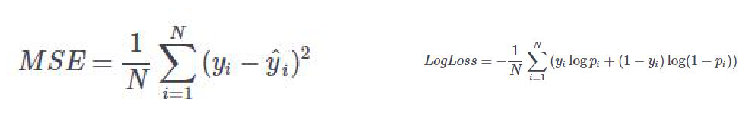

Sklearn MSE: 3.51746. 
Your MSE: 3.51746. 

Sklearn LogLoss: 1.10801
Your LogLoss: 1.10801


In [20]:
# Define a competition metric

# Competition metric is used by Kaggle to evaluate your submissions. Moreover, you also need to measure the performance of 
# different models on a local validation set.
# For now, your goal is to manually develop a couple of competition metrics in case if they are not available in 
# sklearn.metrics.

# In particular, you will define:
# - Mean Squared Error (MSE) for the regression problem:
# - Logarithmic Loss (LogLoss) for the binary classification problem:

plot_2('MSE', 'LogLoss', right=1.7, top=1, wspace=0.3)

###############################################################################################

# Import MSE from sklearn
from sklearn.metrics import mean_squared_error

# Define your own MSE function
def own_mse(y_true, y_pred):
    # Find squared differences
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err

print('Sklearn MSE: {:.5f}. '.format(mean_squared_error(y_test, test_pred)))
print('Your MSE: {:.5f}. \n'.format(own_mse(y_test, test_pred)))

##############################################

# Import log_loss from sklearn
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
    # Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms) 
    return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))


#### Exercício 4 - Initial EDA

house_price_train shape: (1460, 17)
house_price_test shape: (1459, 16)

['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'RoofStyle', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] 

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64


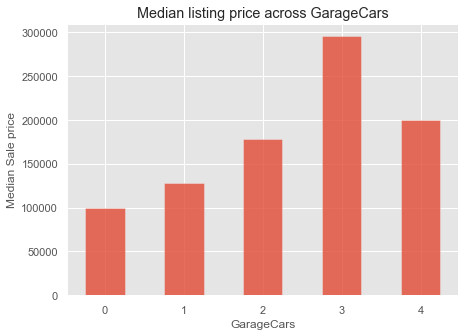

Id  LotArea  OverallQual  YearBuilt RoofStyle  TotalBsmtSF CentralAir  \
0   1     8450            7       2003     Gable          856          Y   
1   2     9600            6       1976     Gable         1262          Y   
2   3    11250            7       2001     Gable          920          Y   
3   4     9550            7       1915     Gable          756          Y   
4   5    14260            8       2000     Gable         1145          Y   

   1stFlrSF  2ndFlrSF  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0       856       854         2         1             3             1   
1      1262         0         2         0             3             1   
2       920       866         2         1             3             1   
3       961       756         1         0             3             1   
4      1145      1053         2         1             4             1   

   TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0             8           2         548     208500  
1             6           2         460     181500  
2             6           2         608     223500  
3             7           3         642     140000  
4             9           3         836     250000

In [21]:
#vídeo

house_price_train = pd.read_csv(data_folder + "house_prices_train.csv")
house_price_test = pd.read_csv(data_folder + "house_prices_test.csv")

# EDA. PartI
print("house_price_train shape: {}".format(house_price_train.shape))
print("house_price_test shape: {}\n".format(house_price_test.shape))

print(house_price_train.columns.tolist(), "\n")

print(house_price_train['GarageCars'].value_counts())

house_price_train.describe()

# EDA. PartII
plt.style.use('ggplot')

# Find the median price by the interest level
prices = house_price_train.groupby('GarageCars', as_index=False)['SalePrice'].median()

# Draw a barplot
fig = plt.figure(figsize=(7, 5))
plt.bar(prices['GarageCars'], prices['SalePrice'], width=0.5, alpha=0.8)  # since as_index=False we can select here

plt.xlabel('GarageCars')
plt.ylabel('Median Sale price')
plt.title('Median listing price across GarageCars')
plt.show()

house_price_train.head()

Exercício 5

In [22]:
# EDA statistics

# New York city taxi fare prediction
taxi_train = pd.read_csv(data_folder + "taxi_train_chapter_4.csv")
taxi_test = pd.read_csv(data_folder + "taxi_test_chapter_4.csv")
################################################################################

# Shapes of train and test data
print('Train shape:', taxi_train.shape)
print('Test shape: {}\n'.format(taxi_test.shape))

# Describe the target variable
print(taxi_train['fare_amount'].describe(), "\n")

# Train distribution of passengers within rides
print(taxi_train['passenger_count'].value_counts())

# Train head()
taxi_train.head()

Train shape: (20000, 8)
Test shape: (9914, 7)

count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64 

1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: passenger_count, dtype: int64


id  fare_amount          pickup_datetime  pickup_longitude  \
0   0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1   1         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2   2          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3   3          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4   4          5.3  2010-03-09 07:51:00 UTC        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1

Exercício 6

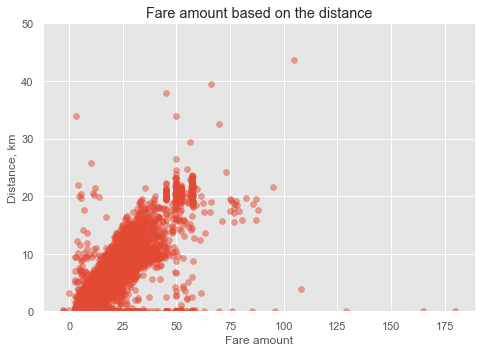

It's obvious now that there is a clear dependency between ride distance and fare amount. So ride distance is,
probably, a good feature.


In [23]:
# EDA plots I

# After generating a couple of basic statistics, it's time to come up with and validate some ideas about the data 
# dependencies. Again, the train DataFrame from the taxi competition is already available in your workspace.

# To begin with, let's make a scatterplot plotting the relationship between the fare amount and the distance of the ride.
# Intuitively, the longer the ride, the higher its price.

# To get the distance in kilometers between two geo-coordinates, you will use Haversine distance. Its calculation is 
# available with the haversine_distance() function defined for you. The function expects train DataFrame as input.

def haversine_distance(df):
    
    data = [df]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        # a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        # c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        # d = R*c
        d = (R * c) #in kilometers
        
    return d

#################################################################################################

# Calculate the ride distance
taxi_train['distance_km'] = haversine_distance(taxi_train)

# Draw a scatterplot
plt.scatter(x=taxi_train['fare_amount'], y=taxi_train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""It's obvious now that there is a clear dependency between ride distance and fare amount. So ride distance is,
probably, a good feature.""")

Exercício 7

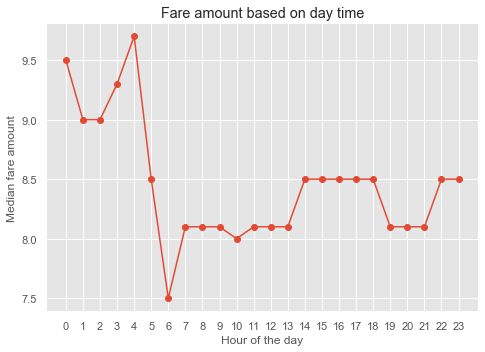

We see that prices are a bit higher during the night. It is a good indicator that we should include the "hour" 
feature in the final model, or at least add a binary feature "is_night".


In [24]:
# EDA plots II

# Another idea that comes to mind is that the price of a ride could change during the day.
# Your goal is to plot the median fare amount for each hour of the day as a simple line plot.The hour feature is calculated.

# Create hour feature
taxi_train['pickup_datetime'] = pd.to_datetime(taxi_train.pickup_datetime)
taxi_train['hour'] = taxi_train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = taxi_train.groupby("hour", as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')

plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

print("""We see that prices are a bit higher during the night. It is a good indicator that we should include the "hour" 
feature in the final model, or at least add a binary feature "is_night".""")

#### Exercício 8 - Local validation

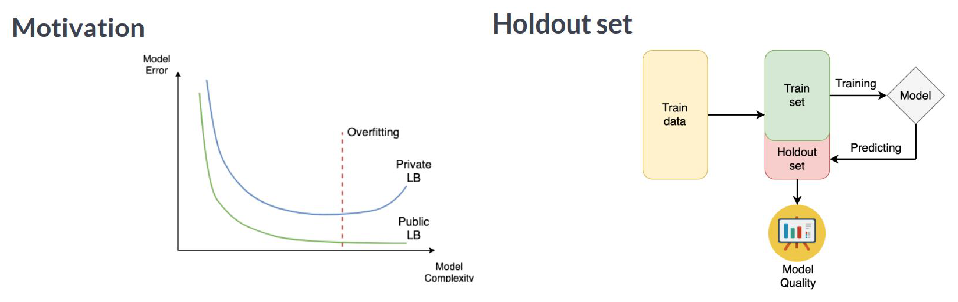

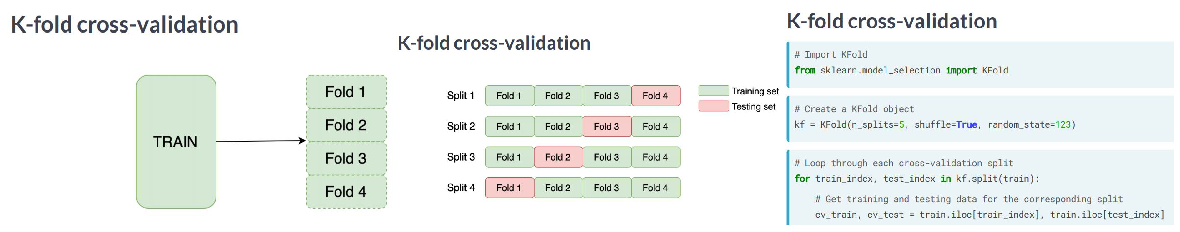

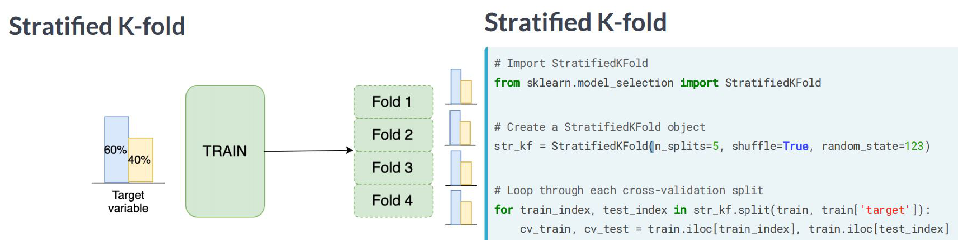

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [25]:
#vídeo

# Bias-variance problem & Holdout set
plot_2('bias_variance', 'holdout_set')


# K-fold cross-validation
plot_3('k_fold_1', 'k_fold_2', 'k_fold_3')

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=123) # if splited it becomes a generator

# Loop through each cross-validation split
for train_index, test_index in kf.split(train):
    # Get training and testing data for the corresponding split
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    
# Stratified K-fold

plot_2('stratified_k_fold', 'stratified_k_fold_2')

from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Loop through each cross-validation split
for train_index, test_index in str_kf.split(train, train['sales']):   # 'sales' is the target
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]


Exercício 9

In [26]:
# K-fold cross-validation

# You will start by getting hands-on experience in the most commonly used K-fold cross-validation.
# The data you'll be working with is from the "Two sigma connect: rental listing inquiries" Kaggle competition. The 
# competition problem is a multi-class classification of the rental listings into 3 classes: low interest, medium interest 
# and high interest. For faster performance, you will work with a subsample consisting of 1,000 observations.
# You need to implement a K-fold validation strategy and look at the sizes of each fold obtained. train DataFrame is 
# already available in your workspace.

train_rental = pd.read_csv(data_folder + "train_rental_sample.csv").drop('Unnamed: 0', axis=1)
#############################

# Import KFold
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in kf.split(train_rental):
    # Obtain training and testing folds
    cv_train, cv_test = train_rental.iloc[train_index], train_rental.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

print("""So, we see that the number of observations in each fold is almost uniform. It means that we've just splitted the
train data into 3 equal folds. However, if we look at the number of medium-interest listings, it's varying from 162 to 175
from one fold to another. To make them uniform among the folds, let's use Stratified K-fold.\n""")
    
train_rental.head()

Fold: 0
CV train shape: (666, 9)
Medium interest listings in CV train: 175

Fold: 1
CV train shape: (667, 9)
Medium interest listings in CV train: 165

Fold: 2
CV train shape: (667, 9)
Medium interest listings in CV train: 162

So, we see that the number of observations in each fold is almost uniform. It means that we've just splitted the
train data into 3 equal folds. However, if we look at the number of medium-interest listings, it's varying from 162 to 175
from one fold to another. To make them uniform among the folds, let's use Stratified K-fold.



id  bathrooms  bedrooms                       building_id  latitude  \
0      10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   40.7145   
1   10000        1.0         2  c5c8a357cba207596b04d1afd1e4f130   40.7947   
2  100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   40.7388   
3  100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   40.7539   
4  100013        1.0         4                                 0   40.8241   

   longitude                        manager_id  price interest_level  
0   -73.9425  5ba989232d0489da1b5f2c45f6688adc   3000         medium  
1   -73.9667  7533621a882f71e25173b27e3139d83d   5465            low  
2   -74.0018  d9039c43983f6e564b1482b273bd7b01   2850           high  
3   -73.9677  1067e078446a7897d2da493d2f741316   3275            low  
4   -73.9493  98e13ad4b495b9613cef886d79a6291f   3350            low

Exercício 10

In [27]:
# Stratified K-fold

# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in str_kf.split(train_rental, train_rental['interest_level']):
    # Obtain training and testing folds
    cv_train, cv_test = train_rental.iloc[train_index], train_rental.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

print("""Now you see that both size and target distribution are the same among the folds. The general rule is to prefer 
Stratified K-Fold over usual K-Fold in any classification problem. Move to the next lesson to learn about other 
cross-validation strategies.""")

Fold: 0
CV train shape: (666, 9)
Medium interest listings in CV train: 167

Fold: 1
CV train shape: (666, 9)
Medium interest listings in CV train: 167

Fold: 2
CV train shape: (668, 9)
Medium interest listings in CV train: 168

Now you see that both size and target distribution are the same among the folds. The general rule is to prefer 
Stratified K-Fold over usual K-Fold in any classification problem. Move to the next lesson to learn about other 
cross-validation strategies.


#### Exercício 11 - Validation usage

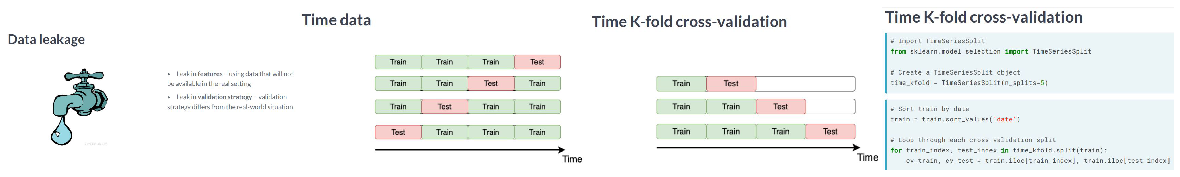

Data leakage: 
- For ex. if we are trying to predict sales in euros and have a feature of sales in pounds. (feature leakage)
- For ex. if we have time data and we have 'data from the future' when doing cross validation. (validation strategy leakage)
Be careful with time data --> use Time K-fold cross validation.

Validation pipeline for any cross-validation scheme:


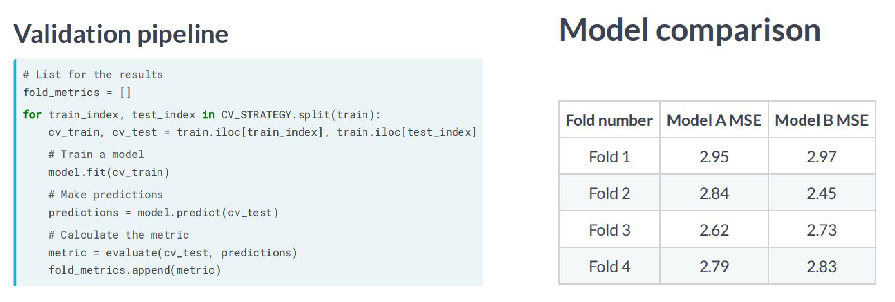

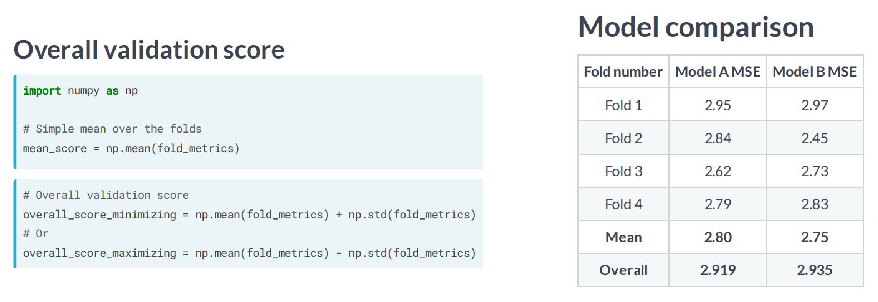

In [28]:
plot_4('data_leakage', 'time_data', 'time_k_fold', 'time_k_fold_cv')
print("""Data leakage: 
- For ex. if we are trying to predict sales in euros and have a feature of sales in pounds. (feature leakage)
- For ex. if we have time data and we have 'data from the future' when doing cross validation. (validation strategy leakage)
Be careful with time data --> use Time K-fold cross validation.

Validation pipeline for any cross-validation scheme:""")
plot_2('validation_pipeline', 'model_comparison_1')
plot_2('overall_validation_score', 'model_comparison_2')

In [29]:
%%script false
#vídeo

# Time K-fold cross-validation

# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=5)

# Sort train by date
train = train.sort_values('date')

# Loop through each cross-validation split
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]

###########################################################################################

# --> Validation pipeline

# List for the results
fold_metrics = []

for train_index, test_index in CV_STRATEGY.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    # Train a model
    model.fit(cv_train)  
    
    # Make predictions
    predictions = model.predict(cv_test)
    
    # Calculate the metric
    metric = evaluate(cv_test, predictions)
    fold_metrics.append(metric)

###########################################################################################

# Overall validation score

# Simple mean over the folds
mean_score = np.mean(fold_metrics)

# Overall validation score
overall_score_minimizing = np.mean(fold_metrics) + np.std(fold_metrics)
# Or
overall_score_maximizing = np.mean(fold_metrics) - np.std(fold_metrics)

Couldn't find program: 'false'


Exercício 12

In [30]:
# Time K-fold

from sklearn.model_selection import TimeSeriesSplit

# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

print("""It works as expected, training only on the past data and predicting the future. Progress to the next exercise to 
evaluate different models.""")

Fold : 0
Train date range: from 2017-12-01 to 2017-12-08
Test date range: from 2017-12-08 to 2017-12-16

Fold : 1
Train date range: from 2017-12-01 to 2017-12-16
Test date range: from 2017-12-16 to 2017-12-24

Fold : 2
Train date range: from 2017-12-01 to 2017-12-24
Test date range: from 2017-12-24 to 2017-12-31

It works as expected, training only on the past data and predicting the future. Progress to the next exercise to 
evaluate different models.


Exercício 13

In [31]:
# Overall validation score

# Now it's time to get the actual model performance using cross-validation. How does our store item demand prediction model 
# perform?
# Your task is to take the Mean Squared Error (MSE) for each fold separately, and then combine these results into a single
# number.
# For simplicity, you're given get_fold_mse() function that for each cross-validation split fits a Random Forest model and 
# returns a list of MSE scores by fold. get_fold_mse() accepts two arguments: train and TimeSeriesSplit object.

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# function to return a list of MSE scores by fold (on a RandomForestRegressor model), for this particular problem
def get_fold_mse(train, kf):
    mse_scores = []
    
    for train_index, test_index in kf.split(train):
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[['store', 'item']], y=fold_train['sales'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[['store', 'item']])
    
        fold_score = round(mean_squared_error(fold_test['sales'], pred), 5)
        mse_scores.append(fold_score)
        
    return mse_scores


In [32]:
# Overall validation score

from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Sort train data by date
train = train.sort_values('date')

# Initialize 3-fold time cross-validation
kf = TimeSeriesSplit(n_splits=3)

# Get MSE scores for each cross-validation split
mse_scores = get_fold_mse(train, kf)

print('Mean validation MSE: {:.5f}\n'.format(np.mean(mse_scores)))

print('MSE by fold: {}'.format(mse_scores))
print('Overall validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))

Mean validation MSE: 955.49186

MSE by fold: [890.30336, 961.65797, 1014.51424]
Overall validation MSE: 1006.38784


# Chapter 3 - Feature Engineering

You will now get exposure to different types of features. You will modify existing features and create new ones. Also, you will treat the missing data accordingly.

#### Exercício 1 - Feature engineering

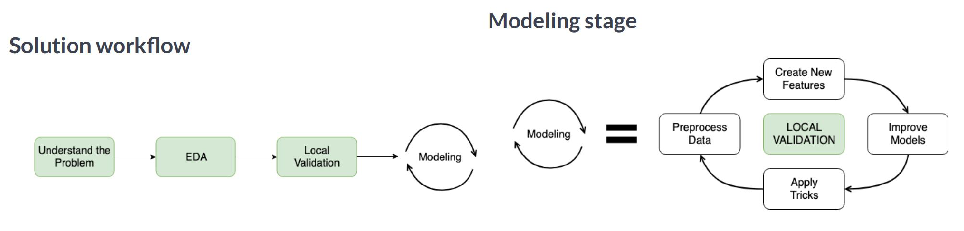

Feature Engineering

Feature types: Numerical; Categorical; Datetime; Coordinates; Text; Images


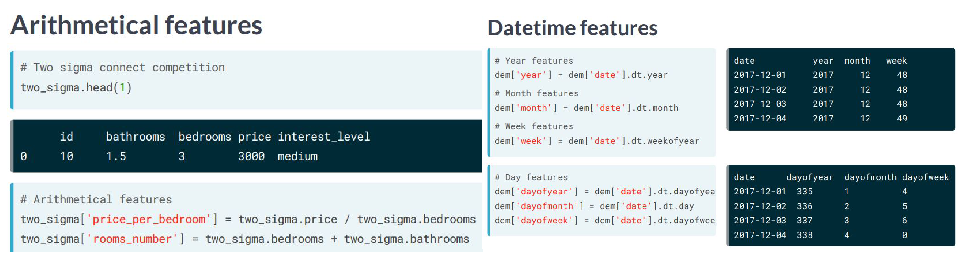

In [33]:
#vídeo

plot_2('solution_workflow_2', 'modeling_stage')
print("""Feature Engineering\n
Feature types: Numerical; Categorical; Datetime; Coordinates; Text; Images""")
plot_2('arithmetical_features', 'datetime_features')

Exercício 2

In [34]:
# Arithmetical features

# To practice creating new features, you will be working with a subsample from the Kaggle competition called "House Prices:
# Advanced Regression Techniques". The goal of this competition is to predict the price of the house based on its 
# properties. It's a regression problem with Root Mean Squared Error as an evaluation metric.
# Your goal is to create new features and determine whether they improve your validation score. To get the validation score
# from 5-fold cross-validation, you're given the get_kfold_rmse() function.

def get_kfold_rmse(train):
    
    mse_scores = []

    for train_index, test_index in kf.split(train):
        train = train.fillna(0)
        features = [x for x in train.columns if x not in ['Id', 'SalePrice', 'RoofStyle', 'CentralAir']]
        
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, min_samples_split=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[features], y=fold_train['SalePrice'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[features])
    
        fold_score = mean_squared_error(fold_test['SalePrice'], pred)
        mse_scores.append(np.sqrt(fold_score))
        
    return round(np.mean(mse_scores) + np.std(mse_scores), 2)


In [35]:
house_price_train = pd.read_csv(data_folder + "house_prices_train.csv")

# Look at the initial RMSE
print('RMSE before feature engineering:', get_kfold_rmse(house_price_train), "\n")

# Add total area of the house
house_price_train['TotalArea'] = house_price_train['TotalBsmtSF'] + \
                                 house_price_train['1stFlrSF'] + house_price_train['2ndFlrSF']
print('RMSE with total area:', get_kfold_rmse(house_price_train))

# Add garden area of the property
house_price_train['GardenArea'] = house_price_train['LotArea'] - house_price_train['1stFlrSF']
print('RMSE with garden area:', get_kfold_rmse(house_price_train))

# Add total number of bathrooms
house_price_train['TotalBath'] = house_price_train['FullBath'] + house_price_train['HalfBath']
print('RMSE with number of bathrooms:', get_kfold_rmse(house_price_train))

print("""\nHere you see that house area improved the RMSE by almost $3,000. Adding garden area improved the RMSE by another
$100. However, with the total number of bathrooms, the RMSE has increased. It means that you keep the new area features, 
but do not add "TotalBath" as a new feature. (aqui desceu mas ok)""")


RMSE before feature engineering: 39774.72 

RMSE with total area: 36823.99
RMSE with garden area: 36736.5
RMSE with number of bathrooms: 36624.96

Here you see that house area improved the RMSE by almost $3,000. Adding garden area improved the RMSE by another
$100. However, with the total number of bathrooms, the RMSE has increased. It means that you keep the new area features, 
but do not add "TotalBath" as a new feature. (aqui desceu mas ok)


Exercício 3

In [36]:
# Date features

# Taxi Fare Prediction
# Your objective is to generate date features from the pickup datetime. Recall that it's better to create new features for 
# train and test data simultaneously. After the features are created, split the data back into the train and test 
# DataFrames. 

# Concatenate train and test together
taxi = pd.concat([taxi_train, taxi_test], sort=False)

# Convert pickup date to datetime object
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'], utc=True)

# Create a day of week feature
taxi['dayofweek'] = taxi['pickup_datetime'].dt.dayofweek

# Create an hour feature
taxi['hour'] = taxi['pickup_datetime'].dt.hour

# Split back into train and test
new_train = taxi[taxi['id'].isin(taxi_train['id'])]
new_test = taxi[taxi['id'].isin(taxi_test['id'])]

new_train.head()

id  fare_amount           pickup_datetime  pickup_longitude  \
0   0          4.5 2009-06-15 17:26:21+00:00        -73.844311   
1   1         16.9 2010-01-05 16:52:16+00:00        -74.016048   
2   2          5.7 2011-08-18 00:35:00+00:00        -73.982738   
3   3          7.7 2012-04-21 04:30:42+00:00        -73.987130   
4   4          5.3 2010-03-09 07:51:00+00:00        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.721319         -73.841610         40.712278                1   
1        40.711303         -73.979268         40.782004                1   
2        40.761270         -73.991242         40.750562                2   
3        40.733143         -73.991567         40.758092                1   
4        40.768008         -73.956655         40.783762                1   

   distance_km  hour  dayofweek  
0     1.030764    17          0  
1     8.450134    16          1  
2     1.389525     0          3  
3     2.799270     4          5  
4     1.999157     7          1

#### Exercício 4 - Categorical features

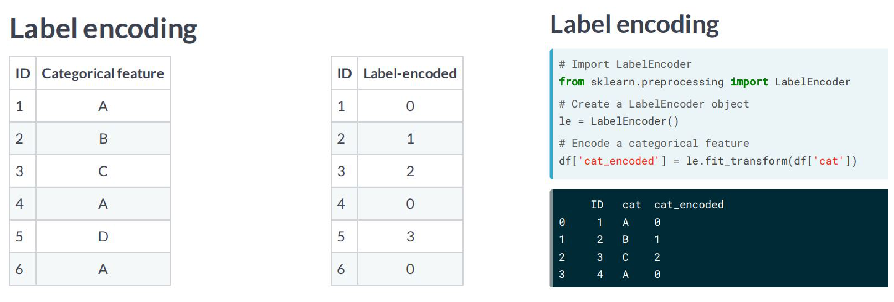

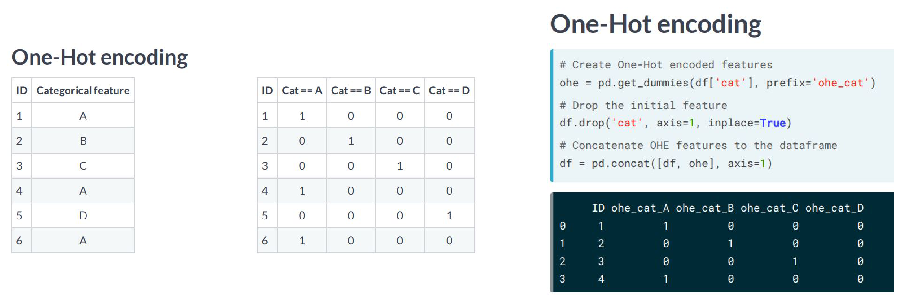

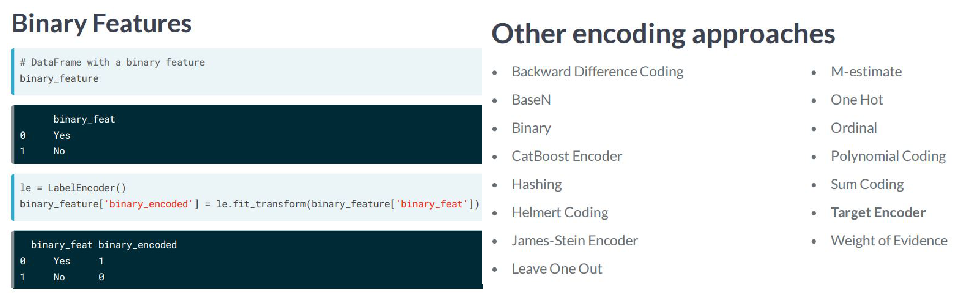

In [37]:
#vídeo

df = pd.DataFrame({'cat': ['A', 'B', 'C', 'A', 'D', 'A']})

# Label encoding
plot_2('label_encoding_1', 'label_encoding_2')

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode a categorical feature
df['cat_encoded'] = le.fit_transform(df['cat'])

######################################################################################


# One-Hot encoding
plot_2('one_hot_encoding_1', 'one_hot_encoding_2')

# Create One-Hot encoded features
ohe = pd.get_dummies(df['cat'], prefix='ohe_cat')

# Drop the initial feature
df.drop('cat', axis=1, inplace=True)

# Concatenate OHE features to the dataframe
df = pd.concat([df, ohe], axis=1)
df

######################################################################################

# Binary Features
binary_feature = pd.DataFrame({'binary_feat': ['Yes', 'No']})

plot_2('binary_features', 'other_encoding')

le = LabelEncoder()

binary_feature['binary_encoded'] = le.fit_transform(binary_feature['binary_feat'])


Exercício 5

In [38]:
# Label encoding

# Concatenate train and test together
houses = pd.concat([house_price_train, house_price_test], sort=False)

# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Create new features
houses['RoofStyle_enc'] = le.fit_transform(houses['RoofStyle'])
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Look at new features
houses[['RoofStyle', 'RoofStyle_enc', 'CentralAir', 'CentralAir_enc']].head(10)

# You can see that categorical variables have been label encoded. However, as you already know, label encoder is not
# always a good choice for categorical variables. Let's go further and apply One-Hot encoding.

RoofStyle  RoofStyle_enc CentralAir  CentralAir_enc
0     Gable              1          Y               1
1     Gable              1          Y               1
2     Gable              1          Y               1
3     Gable              1          Y               1
4     Gable              1          Y               1
5     Gable              1          Y               1
6     Gable              1          Y               1
7     Gable              1          Y               1
8     Gable              1          Y               1
9     Gable              1          Y               1

Exercício 6

In [39]:
# One-Hot encoding

# The problem with label encoding is that it implicitly assumes that there is a ranking dependency between the categories. 
# So, let's change the encoding method for the features "RoofStyle" and "CentralAir" to one-hot encoding. 

# Concatenate train and test together
houses = pd.concat([house_price_train, house_price_test], sort=False)

# Look at feature distributions
print(houses['RoofStyle'].value_counts(), '\n')  # non binary
print(houses['CentralAir'].value_counts(), '\n')   # binary

print("Hence we will one-hot encode RoofStyle and label-encode CentralAir. \n")


# Label encode binary 'CentralAir' feature
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
houses['CentralAir_enc'] = le.fit_transform(houses['CentralAir'])

# Create One-Hot encoded features
ohe = pd.get_dummies(houses['RoofStyle'], prefix='RoofStyle')

# Concatenate OHE features to houses
houses = pd.concat([houses, ohe], axis=1)

# Look at OHE features
houses[[col for col in houses.columns if 'RoofStyle' in col]].head(3)


Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64 

Y    2723
N     196
Name: CentralAir, dtype: int64 

Hence we will one-hot encode RoofStyle and label-encode CentralAir. 



RoofStyle  RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  \
0     Gable               0                1                  0   
1     Gable               0                1                  0   
2     Gable               0                1                  0   

   RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  
0              0                  0               0  
1              0                  0               0  
2              0                  0               0

#### Exercício 7 - Target encoding

Target encoding: as a label encoder it provides a single column but also creates a **correlation** between the 
categories and the target variable. There are several ways to 'target-encode', but we'll consider the most common one:
Mean Target encoding


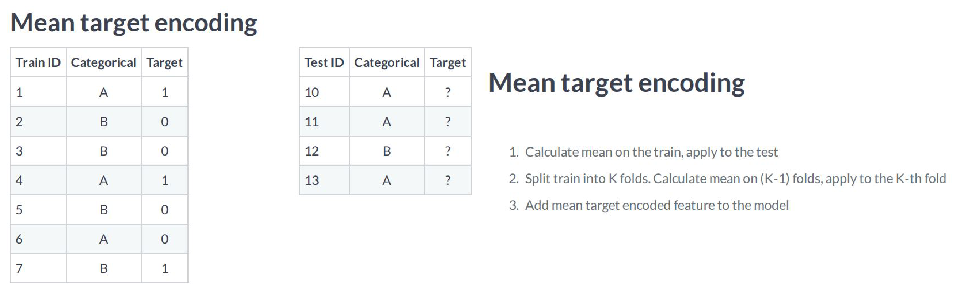

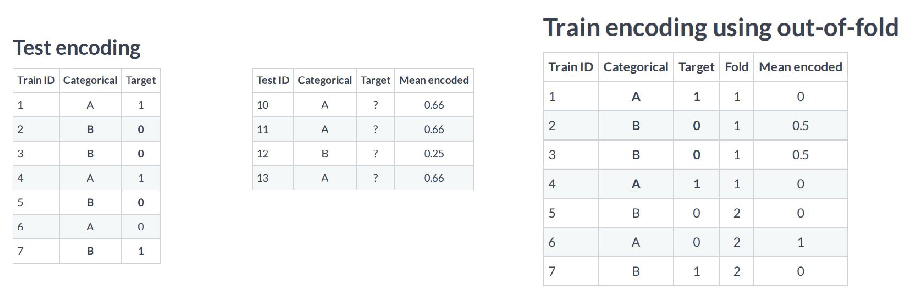

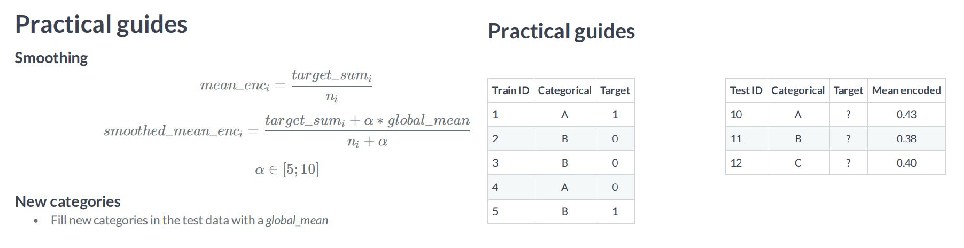

In [40]:
#vídeo

# High cardinality categorical features --> what to do with them?

print("""Target encoding: as a label encoder it provides a single column but also creates a **correlation** between the 
categories and the target variable. There are several ways to 'target-encode', but we'll consider the most common one:
Mean Target encoding""")

plot_2('mean_target_encoding_0', 'mean_target_encoding_1')

plot_2('test_encoding_0', 'train_out_of_fold')

plot_2('practical_guides', 'practical_guides_1')


Exercício 8

In [41]:
# Mean target encoding

**Mean target encoding**

First of all, you will create a function that implements mean target encoding. Remember that you need to develop the two following steps:

 1. Calculate the mean on the train, apply to the test
 2. Split train into K folds. Calculate the out-of-fold mean for each fold, apply to this particular fold

Each of these steps will be implemented in a separate function: *test_mean_target_encoding()* and *train_mean_target_encoding()*, respectively.

The final function *mean_target_encoding()* takes as arguments: the train and test DataFrames, the name of the categorical column to be encoded, the name of the target column and a smoothing parameter alpha. It returns two values: a new feature for train and test DataFrames, respectively.

In [42]:
def test_mean_target_encoding(train, test, target, categorical, alpha=5):
    # Calculate global mean on the train data
    global_mean = train[target].mean()
    
    # Group by the categorical feature and calculate its properties
    train_groups = train.groupby(categorical)
    category_sum = train_groups[target].sum()
    category_size = train_groups.size()
    
    # Calculate smoothed mean target statistics
    train_statistics = (category_sum + global_mean * alpha) / (category_size + alpha)
    
    # Apply statistics to the test data and fill new categories
    test_feature = test[categorical].map(train_statistics).fillna(global_mean)
    return test_feature.values


def train_mean_target_encoding(train, target, categorical, alpha=5):
    # Create 5-fold cross-validation
    kf = KFold(n_splits=5, random_state=123, shuffle=True)
    train_feature = pd.Series(index=train.index)
    
    # For each folds split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
      
        # Calculate out-of-fold statistics and apply to cv_test
        cv_test_feature = test_mean_target_encoding(cv_train, cv_test, target, categorical, alpha)
        
        # Save new feature for this particular fold
        train_feature.iloc[test_index] = cv_test_feature       
    return train_feature.values



def mean_target_encoding(train, test, target, categorical, alpha=5):
    # Get the train feature
    train_feature = train_mean_target_encoding(train, target, categorical, alpha)
  
    # Get the test feature
    test_feature = test_mean_target_encoding(train, test, target, categorical, alpha)
    
    # Return new features to add to the model
    return train_feature, test_feature


Exercício 9

In [43]:
# K-fold cross-validation

# You will work with a binary classification problem on a subsample from Kaggle playground competition. The objective of 
# this competition is to predict whether a famous basketball player Kobe Bryant scored a goal or missed a particular shot.

# Train data is available in your workspace as bryant_shots DataFrame. It contains data on 10,000 shots with its properties
# and a target variable "shot_made_flag" -- whether shot was scored or not.

# One of the features in the data is "game_id" -- a particular game where the shot was made. There are 541 distinct games. 
# So, you deal with a high-cardinality categorical feature. Let's encode it using a target mean!

# Suppose you're using 5-fold cross-validation and want to evaluate a mean target encoded feature on the local validation.

bryant_shots = pd.read_csv(data_folder + "bryant_shots_sample.csv").drop('Unnamed: 0', axis=1)

#############################################################################################

# Create 5-fold cross-validation
kf = KFold(n_splits=5, random_state=123, shuffle=True)

# For each folds split
for train_index, test_index in kf.split(bryant_shots):
    cv_train, cv_test = bryant_shots.iloc[train_index], bryant_shots.iloc[test_index]

    # Create mean target encoded feature
    cv_train['game_id_enc'], cv_test['game_id_enc'] = mean_target_encoding(train=cv_train,
                                                                           test=cv_test,
                                                                           target='shot_made_flag',
                                                                           categorical='game_id',
                                                                           alpha=5)
    # Look at the encoding
    print(cv_train[['game_id', 'shot_made_flag', 'game_id_enc']].sample(n=1))


print("""\nYou could see different game encodings for each validation split in the output. The main conclusion you should 
make: while using local cross-validation, you need to repeat mean target encoding procedure inside each folds split 
separately.""")    

cv_train.head()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       game_id  shot_made_flag  game_id_enc
1316  20000896             0.0      0.40957
       game_id  shot_made_flag  game_id_enc
8067  20500286             0.0     0.367848
       game_id  shot_made_flag  game_id_enc
6240  20400014             1.0     0.309416
      game_id  shot_made_flag  game_id_enc
503  20000309             0.0     0.375064
       game_id  shot_made_flag  game_id_enc
3285  20200106             1.0     0.276083

You could see different game encodings for each validation split in the output. The main conclusion you should 
make: while using local cross-validation, you need to repeat mean target encoding procedure inside each folds split 
separately.


shot_id   game_id      lat       lon  minutes_remaining  playoffs   season  \
0        1  20000012  33.9723 -118.1028                 10         0  2000-01   
1        2  20000012  34.0443 -118.4268                 10         0  2000-01   
2        3  20000012  33.9093 -118.3708                  7         0  2000-01   
3        4  20000012  33.8693 -118.1318                  6         0  2000-01   
4        5  20000012  34.0443 -118.2698                  6         0  2000-01   

   shot_distance       shot_type  shot_made_flag  game_id_enc  
0             18  2PT Field Goal             NaN     0.480429  
1             15  2PT Field Goal             0.0     0.480429  
2             16  2PT Field Goal             1.0     0.326786  
3             22  2PT Field Goal             0.0     0.326786  
4              0  2PT Field Goal             1.0     0.326905

Exercício 10

In [44]:
# Beyond binary classification

# Of course, binary classification is just a single special case. Target encoding could be applied to any target variable
# type:

#  - For binary classification usually mean target encoding is used
#  - For regression mean could be changed to median, quartiles, etc.
#  - For multi-class classification with N classes we create N features with target mean for each category in one vs. all 
# fashion

# The mean_target_encoding() function you've created could be used for any target type specified above. Let's apply it for 
# the regression problem on the example of House Prices Kaggle competition.

# Your goal is to encode a categorical feature "RoofStyle" using mean target encoding. 

house_price_train = pd.read_csv(data_folder + "house_prices_train.csv")
house_price_test = pd.read_csv(data_folder + "house_prices_test.csv")

#########################################################################################################

# Create mean target encoded feature
house_price_train['RoofStyle_enc'], house_price_test['RoofStyle_enc'] = mean_target_encoding(train=house_price_train,
                                                                     test=house_price_test,
                                                                     target='SalePrice',
                                                                     categorical='RoofStyle',
                                                                     alpha=10)

# Look at the encoding
house_price_test[['RoofStyle', 'RoofStyle_enc']].drop_duplicates()


RoofStyle  RoofStyle_enc
0        Gable  171565.947836
1          Hip  217594.645131
98     Gambrel  164152.950424
133       Flat  188703.563431
362    Mansard  180775.938759
1053      Shed  188267.663242

In [45]:
# So, you observe that houses with the Hip roof are the most pricy, while houses with the Gambrel roof are the cheapest. 
# It's exactly the goal of target encoding: you've encoded categorical feature in such a manner that there is now a
# correlation between category values and target variable.

#### Exercício 11 - Missing data

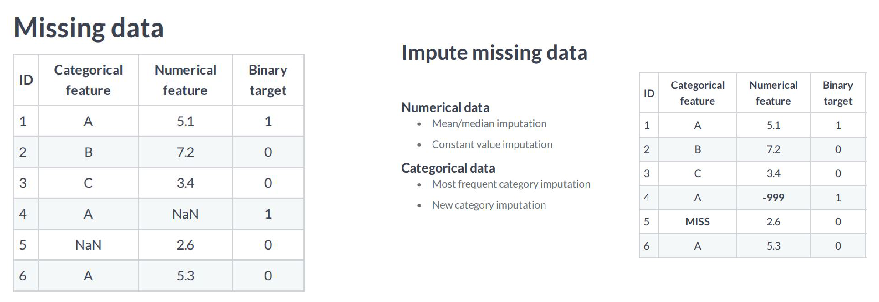

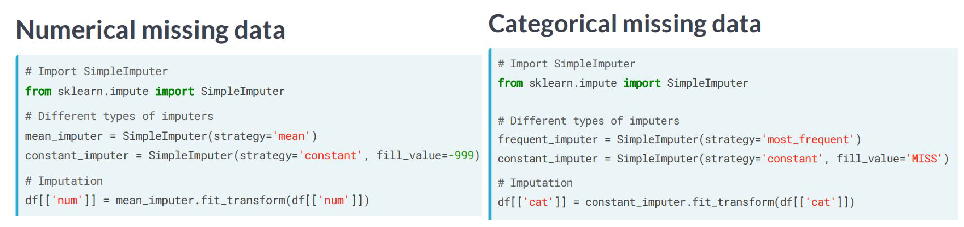

num   cat
0  1.000000     A
1  2.000000     B
2  3.000000     C
3  2.166667     A
4  4.000000  MISS
5  2.000000     D
6  1.000000  MISS

In [46]:
#vídeo

df = pd.DataFrame({'num': [1, 2, 3, np.nan, 4, 2, 1], 'cat': ['A', 'B', 'C', 'A', np.nan, 'D', np.nan]})

plot_2('missing_data', 'missing_solutions')

# Numerical missing data

# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Different types of imputers
mean_imputer = SimpleImputer(strategy='mean')
constant_imputer = SimpleImputer(strategy='constant', fill_value=-999)

# Imputation
df[['num']] = mean_imputer.fit_transform(df[['num']])

#####################################################################################

plot_2('numerical_md', 'categorical_md')

# Categorical missing data

# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Different types of imputers
frequent_imputer = SimpleImputer(strategy='most_frequent')
constant_imputer = SimpleImputer(strategy='constant', fill_value='MISS')

# Imputation
df[['cat']] = constant_imputer.fit_transform(df[['cat']])
df

Exercício 12

In [47]:
# Find missing data

# Let's impute missing data on a real Kaggle dataset. For this purpose, you will be using a data subsample from the Kaggle
# "Two sigma connect: rental listing inquiries" competition.

# Before proceeding with any imputing you need to know the number of missing values for each of the features. Moreover, if 
# the feature has missing values, you should explore the type of this feature.

# Find the number of missing values in each column
print(train_rental.isnull().sum())

# Look at the columns with the missing values
train_rental[[ 'building_id', 'price']].head()  # era suposto ter estas duas com valores em falta

id                0
bathrooms         0
bedrooms          0
building_id       0
latitude          0
longitude         0
manager_id        0
price             0
interest_level    0
dtype: int64


building_id  price
0  53a5b119ba8f7b61d4e010512e0dfc85   3000
1  c5c8a357cba207596b04d1afd1e4f130   5465
2  c3ba40552e2120b0acfc3cb5730bb2aa   2850
3  28d9ad350afeaab8027513a3e52ac8d5   3275
4                                 0   3350

Exercício 13

In [48]:
# Impute missing data

# You've found that "price" and "building_id" columns have missing values in the Rental Listing Inquiries dataset. So, 
# before passing the data to the models you need to impute these values.

# Numerical feature "price" will be encoded with a mean value of non-missing prices.

# Imputing categorical feature "building_id" with the most frequent category is a bad idea, because it would mean that all
# the apartments with a missing "building_id" are located in the most popular building. The better idea is to impute it 
# with a new category.

######################################################################################

# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create mean imputer
mean_imputer = SimpleImputer(strategy='mean')

# Price imputation
train_rental[['price']] = mean_imputer.fit_transform(train_rental[['price']])

######################################################################################

# Create constant imputer
constant_imputer = SimpleImputer(strategy='constant', fill_value="MISSING")

# building_id imputation
train_rental[['building_id']] = constant_imputer.fit_transform(train_rental[['building_id']])

train_rental.head()


id  bathrooms  bedrooms                       building_id  latitude  \
0      10        1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   40.7145   
1   10000        1.0         2  c5c8a357cba207596b04d1afd1e4f130   40.7947   
2  100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   40.7388   
3  100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   40.7539   
4  100013        1.0         4                                 0   40.8241   

   longitude                        manager_id   price interest_level  
0   -73.9425  5ba989232d0489da1b5f2c45f6688adc  3000.0         medium  
1   -73.9667  7533621a882f71e25173b27e3139d83d  5465.0            low  
2   -74.0018  d9039c43983f6e564b1482b273bd7b01  2850.0           high  
3   -73.9677  1067e078446a7897d2da493d2f741316  3275.0            low  
4   -73.9493  98e13ad4b495b9613cef886d79a6291f  3350.0            low

# Chapter 4 - Modeling

Time to bring everything together and build some models! In this last chapter, you will build a base model before tuning some hyperparameters and improving your results with ensembles. You will then get some final tips and tricks to help you compete more efficiently.

#### Exercício 1 - Baseline model

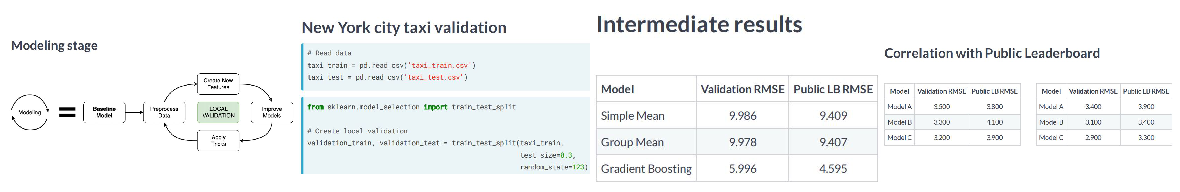

In [49]:
#vídeo

plot_4('baseline_model', 'validation', 'intermediate_results', 'public_leaderboard_correlation')

from sklearn.model_selection import train_test_split

# Create local validation
validation_train, validation_test = train_test_split(taxi_train, test_size=0.3, random_state=123)

##################

# ---> Baseline model I

# Assign the mean fare amount to all the test observations
taxi_test['fare_amount'] = np.mean(taxi_train['fare_amount'])

# Write predictions to the file
# taxi_test[['id', 'fare_amount']].to_csv(data_folder + 'mean_sub.csv', index=False)

##

# ---> Baseline model II

# Calculate the mean fare amount by group
naive_prediction_groups = taxi_train.groupby('passenger_count').fare_amount.mean()

# Make predictions on the test set
taxi_test['fare_amount'] = taxi_test['passenger_count'].map(naive_prediction_groups)

# Write predictions to the file
# taxi_test[['id', 'fare_amount']].to_csv(data_folder + 'mean_group_sub.csv', index=False)

##

# ---> Baseline model III

# Select only numeric features
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor()
gb.fit(taxi_train[features], taxi_train['fare_amount'])

# Make predictions on the test data
taxi_test['fare_amount'] = gb.predict(taxi_test[features])

# Write predictions to the file
# taxi_test[['id','fare_amount']].to_csv('gb_sub.csv', index=False)


Exercício 2

In [50]:
# Replicate validation score

# Create local validation
validation_train, validation_test = train_test_split(taxi_train, test_size=0.3, random_state=123)

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate the mean fare_amount on the validation_train data
naive_prediction = np.mean(validation_train['fare_amount'])

# Assign naive prediction to all the holdout observations
validation_test['pred'] = naive_prediction

# Measure the local RMSE
rmse = np.sqrt(mean_squared_error(validation_test['fare_amount'], validation_test['pred']))

print('Validation RMSE for Baseline I model: {:.3f}'.format(rmse))


Validation RMSE for Baseline I model: 9.986


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Exercício 3

In [51]:
taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
id                   20000 non-null int64
fare_amount          20000 non-null float64
pickup_datetime      20000 non-null datetime64[ns, UTC]
pickup_longitude     20000 non-null float64
pickup_latitude      20000 non-null float64
dropoff_longitude    20000 non-null float64
dropoff_latitude     20000 non-null float64
passenger_count      20000 non-null int64
distance_km          20000 non-null float64
hour                 20000 non-null int64
dtypes: datetime64[ns, UTC](1), float64(6), int64(3)
memory usage: 1.5 MB


In [52]:
# Baseline based on the date

# Get pickup hour from the pickup_datetime column
taxi_train['hour'] = taxi_train['pickup_datetime'].dt.hour
taxi_test['hour'] = pd.to_datetime(taxi_test['pickup_datetime']).dt.hour

# Calculate average fare_amount grouped by pickup hour 
hour_groups = taxi_train.groupby('hour')['fare_amount'].mean()

# Make predicitons on the test set
taxi_test['fare_amount'] = taxi_test.hour.map(hour_groups)

# Write predictions
taxi_test[['id','fare_amount']].to_csv(data_folder + 'hour_mean_sub.csv', index=False)

print("""Such baseline achieves 1409th place on the Public Leaderboard which is slightly better than grouping by the number
of passengers. Also, remember to replicate all the results for the validation set as it was done in the previous exercise.
""")

Such baseline achieves 1409th place on the Public Leaderboard which is slightly better than grouping by the number
of passengers. Also, remember to replicate all the results for the validation set as it was done in the previous exercise.



Exercício 4

In [53]:
# Baseline based on the gradient boosting

from sklearn.ensemble import RandomForestRegressor

# Select only numeric features
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour']

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100)

rf.fit(taxi_train[features], taxi_train.fare_amount)

# Make predictions on the test data
taxi_test['fare_amount'] = rf.predict(taxi_test[features])

# Write predictions
taxi_test[['id','fare_amount']].to_csv(data_folder + 'rf_sub.csv', index=False)

print("""This final baseline achieves the 1051st place on the Public Leaderboard which is slightly better than the Gradient 
Boosting from the video. So, now you know how to build fast and simple baseline models to validate your initial pipeline.
""")

This final baseline achieves the 1051st place on the Public Leaderboard which is slightly better than the Gradient 
Boosting from the video. So, now you know how to build fast and simple baseline models to validate your initial pipeline.



#### Exercício 5 - Hyperparameter tuning

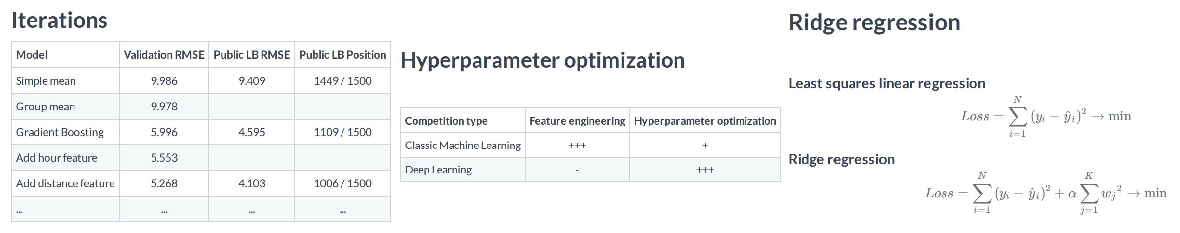

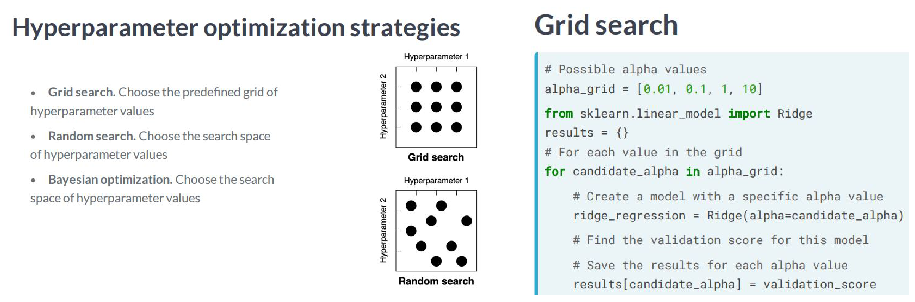

In [54]:
#vídeo

plot_3('iterations', 'hyperparameter_optimization', 'ridge')

plot_2('hyp_strategies', 'grid_search')

from sklearn.linear_model import Ridge

# Possible alpha values
alpha_grid = [0.01, 0.1, 1, 10]

results = {}

# # For each value in the grid
# for candidate_alpha in alpha_grid:
#     # Create a model with a specific alpha value
#     ridge_regression = Ridge(alpha=candidate_alpha)
    
#     # Find the validation score for this model
        
#     # Save the results for each alpha value
#     results[candidate_alpha] = validation_score


Exercício 6

In [55]:
def get_cv_score(train, params):
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)

    rmse_scores = []
    
    # Loop through each split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123, **params).fit(cv_train[features], cv_train.fare_amount)
    
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
    
        fold_score = np.sqrt(mean_squared_error(cv_test['fare_amount'], pred))
        rmse_scores.append(fold_score)
    
    return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)

In [56]:
%%time
# Grid search

# Possible max depth values
max_depth_grid = [3, 6, 9, 12]
results = {}

# For each value in the grid
for max_depth_candidate in max_depth_grid:
    # Specify parameters for the model
    params = {'max_depth': max_depth_candidate}

    # Calculate validation score for a particular hyperparameter
    validation_score = get_cv_score(taxi_train, params)

    # Save the results for each max depth value
    results[max_depth_candidate] = validation_score   

print(results)

print("""\nThe optimal max depth value is located somewhere between 3 and 6. The next step could be to use a smaller grid,
for example [3, 4, 5, 6] and repeat the same process. Moving from larger to smaller grids allows us to find the most 
optimal values.\n""")

{3: 5.67294, 6: 5.36575, 9: 5.367, 12: 5.50689}

The optimal max depth value is located somewhere between 3 and 6. The next step could be to use a smaller grid,
for example [3, 4, 5, 6] and repeat the same process. Moving from larger to smaller grids allows us to find the most 
optimal values.

Wall time: 54.2 s


Exercício 7

In [57]:
%%time
# 2D grid search

import itertools

# Hyperparameter grids
max_depth_grid = [3, 5, 7]
subsample_grid = [0.8, 0.9, 1]
results = {}

# For each couple in the grid
for max_depth_candidate, subsample_candidate in itertools.product(max_depth_grid, subsample_grid):
    
    params = {'max_depth': max_depth_candidate, 'subsample': subsample_candidate}
    
    validation_score = get_cv_score(taxi_train, params)
    
    # Save the results for each couple
    results[(max_depth_candidate, subsample_candidate)] = validation_score   
    
print(results)

print("""\nYou can see that tuning multiple hyperparameters simultaneously achieves better results. In the previous 
exercise, tuning only the max_depth parameter gave the best RMSE of $6.50. With max_depth equal to 7 and subsample equal to
0.8, the best RMSE is now $6.16. However, do not spend too much time on the hyperparameter tuning at the beginning of the 
competition. Another approach that almost always improves your solution is model ensembling.\n""")


{(3, 0.8): 5.66723, (3, 0.9): 5.6497, (3, 1): 5.67294, (5, 0.8): 5.36977, (5, 0.9): 5.4072, (5, 1): 5.31418, (7, 0.8): 5.40861, (7, 0.9): 5.42507, (7, 1): 5.35984}

You can see that tuning multiple hyperparameters simultaneously achieves better results. In the previous 
exercise, tuning only the max_depth parameter gave the best RMSE of $6.50. With max_depth equal to 7 and subsample equal to
0.8, the best RMSE is now $6.16. However, do not spend too much time on the hyperparameter tuning at the beginning of the 
competition. Another approach that almost always improves your solution is model ensembling.

Wall time: 41.6 s


#### Exercício 8 - Model ensembling

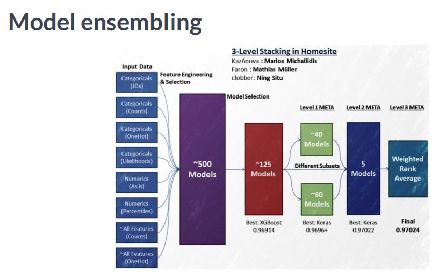

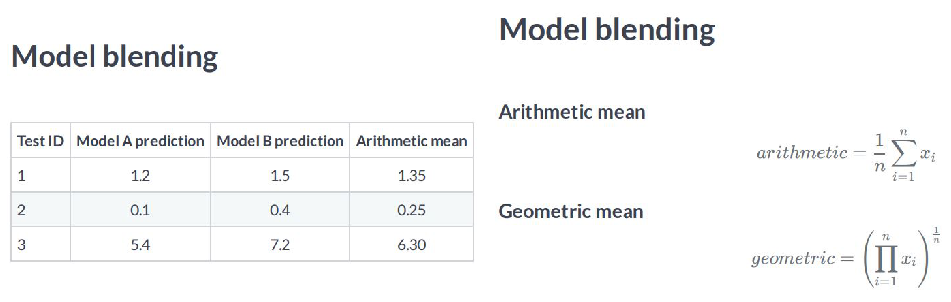

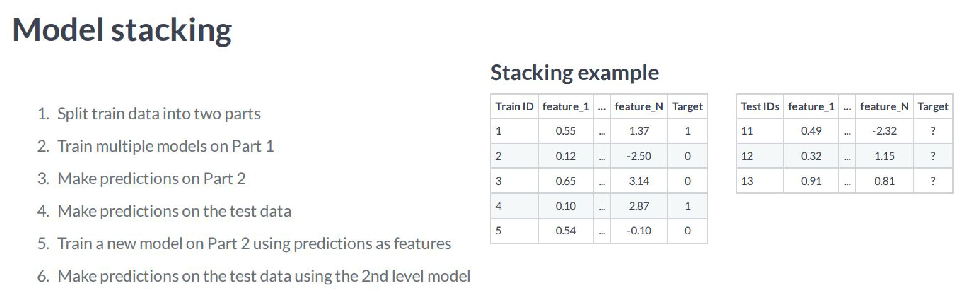

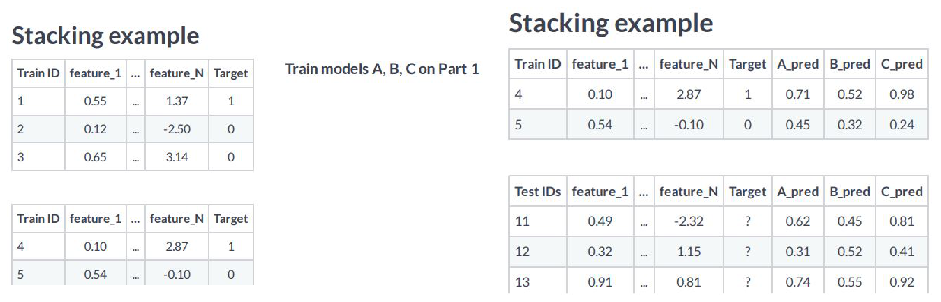

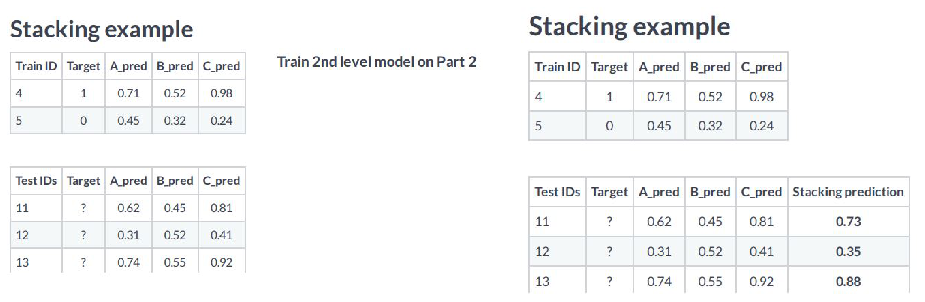

In [58]:
#vídeo

plot_1('model_ensembling')

plot_2('blending', 'blending_means')

plot_2('model_stacking', 'stacking_1')
plot_2('stacking_2', 'stacking_3')
plot_2('stacking_4', 'stacking_5')

Exercício 9

In [59]:
%%time

# Model blending

# Your goal is to train 2 different models on the New York City Taxi competition data. Make predictions on the test data 
# and then blend them using a simple arithmetic mean.

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=100).fit(taxi_train[features], taxi_train['fare_amount'])

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100).fit(taxi_train[features], taxi_train['fare_amount'])

# Make predictions on the test data
taxi_test['gb_pred'] = gb.predict(taxi_test[features])
taxi_test['rf_pred'] = rf.predict(taxi_test[features])

# Find mean of model predictions
taxi_test['blend'] = (taxi_test['gb_pred'] + taxi_test['rf_pred']) / 2

taxi_test[['gb_pred', 'rf_pred', 'blend']].head()


Wall time: 20.3 s


gb_pred  rf_pred      blend
0  8.084739    8.951   8.517869
1  8.758979    8.553   8.655989
2  8.084739    5.910   6.997369
3  7.993308    9.397   8.695154
4  9.012971   13.314  11.163485

Exercício 10

In [60]:
%%time

# Model stacking I

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Split train data into two parts
part_1, part_2 = train_test_split(taxi_train, test_size=0.5, random_state=123)

# Train a Gradient Boosting model on Part 1
gb = GradientBoostingRegressor(n_estimators=100).fit(part_1[features], part_1['fare_amount'])

# Train a Random Forest model on Part 1
rf = RandomForestRegressor(n_estimators=100).fit(part_1[features], part_1['fare_amount'])

# Make predictions on the Part 2 data
part_2['gb_pred'] = gb.predict(part_2[features])
part_2['rf_pred'] = rf.predict(part_2[features])

# Make predictions on the test data
taxi_test['gb_pred'] = gb.predict(taxi_test[features])
taxi_test['rf_pred'] = rf.predict(taxi_test[features])


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Wall time: 10 s


Exercício 11

In [61]:
# Model stacking II

# Now, your goal is to create a second level model using predictions from steps 3 and 4 as features. So, this model is
# trained on Part 2 data and then you can make stacking predictions on the test data.

from sklearn.linear_model import LinearRegression

# Create linear regression model without the intercept
lr = LinearRegression(fit_intercept=False)

# Train 2nd level model on the Part 2 data
lr.fit(part_2[['gb_pred', 'rf_pred']], part_2['fare_amount'])

# Make stacking predictions on the test data
taxi_test['stacking'] = lr.predict(taxi_test[['gb_pred', 'rf_pred']])

# Look at the model coefficients
print(lr.coef_)

print("""\nUsually, the 2nd level model is some simple model like Linear or Logistic Regressions. Also, note that you were
not using intercept in the Linear Regression just to combine pure model predictions. Looking at the coefficients, it's 
clear that 2nd level model has more trust to the Gradient Boosting: {} versus {} for the Random Forest model.""".format(
round(lr.coef_[0], 2), round(lr.coef_[1], 2)))


[0.21477613 0.78559148]

Usually, the 2nd level model is some simple model like Linear or Logistic Regressions. Also, note that you were
not using intercept in the Linear Regression just to combine pure model predictions. Looking at the coefficients, it's 
clear that 2nd level model has more trust to the Gradient Boosting: 0.21 versus 0.79 for the Random Forest model.


#### Exercício 12 - Final tips

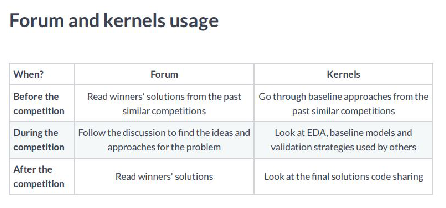

In [62]:
#vídeo

plot_1('forum')

Exercício 13

In [63]:
def get_cv_score(train):
    features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'distance_km', 'hour', 'weird_feature']
    
    features = [x for x in features if x in train.columns]
  
    # Create KFold object
    kf = KFold(n_splits=3, shuffle=True, random_state=123)

    rmse_scores = []
    
    # Loop through each split
    for train_index, test_index in kf.split(train):
        cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
        # Train a Gradient Boosting model
        gb = GradientBoostingRegressor(random_state=123).fit(cv_train[features], cv_train.fare_amount)
    
        # Make predictions on the test data
        pred = gb.predict(cv_test[features])
    
        fold_score = np.sqrt(mean_squared_error(cv_test['fare_amount'], pred))
        rmse_scores.append(fold_score)
    
    return np.round(np.mean(rmse_scores) + np.std(rmse_scores), 5)

In [64]:
# Testing Kaggle forum ideas

# Unfortunately, not all the Forum posts and Kernels are necessarily useful for your model. So instead of blindly 
# incorporating ideas into your pipeline, you should test them first.


# Suggestion 1: the passenger_count feature is useless. Let's see. Drop this feature and compare the scores.

# Delete passenger_count column
new_train_1 = taxi_train.drop('passenger_count', axis=1)

# Compare validation scores
initial_score = get_cv_score(taxi_train)
new_score = get_cv_score(new_train_1)

print('Initial score is {} and the new score is {}'.format(initial_score, new_score))


# Suggestion 2: Sum of "pickup_latitude" and "distance_km" is a good feature. Let's try it

# Create copy of the initial train DataFrame
new_train_2 = taxi_train.copy()

# Find sum of pickup latitude and ride distance
new_train_2['weird_feature'] = new_train_2.pickup_latitude + new_train_2.distance_km

# Compare validation scores
initial_score = get_cv_score(taxi_train)
new_score = get_cv_score(new_train_2)

print('Initial score is {} and the new score is {}'.format(initial_score, new_score))


Initial score is 5.11845 and the new score is 5.13298
Initial score is 5.11845 and the new score is 5.14805


Exercício 14

In [65]:
# Select final submissions

# The last action in every competition is selecting final submissions. Your goal is to select 2 final submissions based on 
# the local validation and Public Leaderboard scores. Suppose that the competition metric is RMSE (the lower the metric the 
# better). Keep up with a selection strategy we've discussed in the slides:

# Local validation: 1.25; Leaderboard: 1.35.
# Local validation: 1.32; Leaderboard: 1.39.
# Local validation: 1.10; Leaderboard: 1.29.
# Local validation: 1.17; Leaderboard: 1.25.
# Local validation: 1.21; Leaderboard: 1.32.

print("""3 and 4. Submission 3 is the best on local validation and submission 4 is the best on Public Leaderboard. 
Hence, it is the best choice for the final submissions.""")


3 and 4. Submission 3 is the best on local validation and submission 4 is the best on Public Leaderboard. 
Hence, it is the best choice for the final submissions.


#### Exercício 15 - end

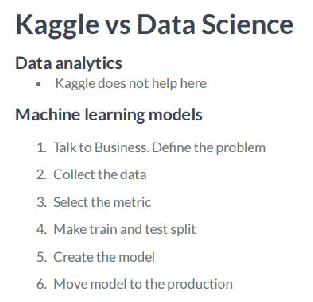

In [66]:
#vídeo
plot_1('kaggle_data_science')

# Fim